<h1 style="font-size:3rem;color:orange;">Transverse Dynamics of a String</h1>

<h2 style="font-size:2rem;color:black;">Problem Statement:</h2>




### Given a string of length $l$, mass per unit length $\rho$, damping coefficient $b$, and external force $f$, and tension force $T$, compute natural frequency and impulse response.

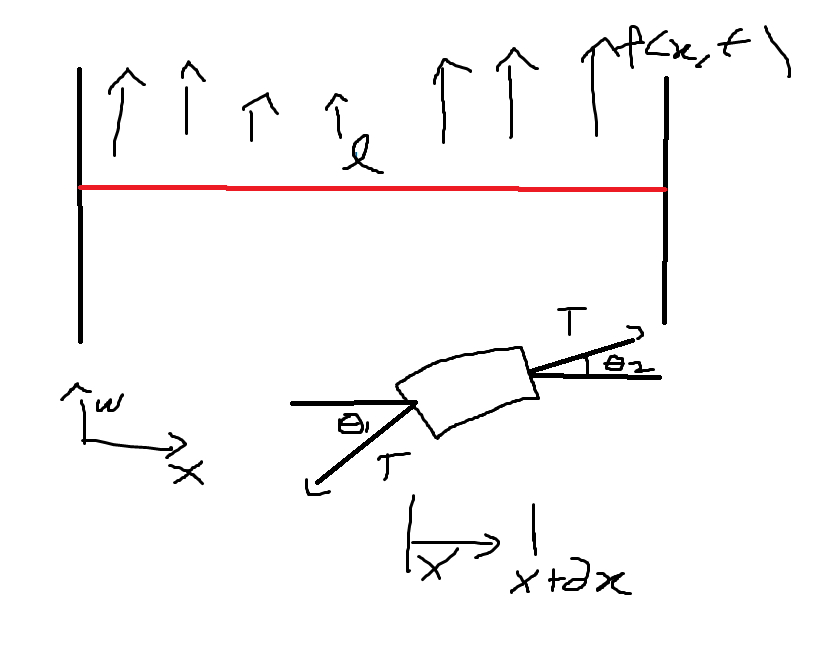

Using Newtons second law on the element:

## $\vec{F}=m\vec{a}$

## $\rho (x) dx \dfrac{\partial^2 w(x,t)}{\partial t^2} = f(x,t)dx - b\dfrac{\partial w(x,t)}{\partial t}dx - T\sin{\theta_1(x,t)} + T\sin{\theta_2(x,t)}$

For small $\theta$:

$\sin{\theta_1}=\tan{\theta_1}=\dfrac{dw}{dx}$

$\sin{\theta_2}=\tan{\theta_2}=\dfrac{dw}{dx} + \dfrac{d}{dx}\dfrac{dw}{dx}dx$

$\sin{\theta_2}=\dfrac{dw}{dx} + \dfrac{d^2w}{dx^2}dx$

Re-writing the equations in terms of $w$ & $x$:

## $\rho (x) dx \dfrac{\partial^2 w(x,t)}{\partial t^2} = f(x,t)dx - b\dfrac{\partial w(x,t)}{\partial t}dx - T\dfrac{dw(x,t)}{dx} + T(\dfrac{dw(x,t)}{dx} + \dfrac{d^2w(x,t)}{dx^2}dx)$

Cancelling tension terms and dx:

## $\rho (x) \dfrac{\partial^2 w(x,t)}{\partial t^2} = f(x,t) - b\dfrac{\partial w(x,t)}{\partial t} + T\dfrac{d^2w(x,t)}{dx^2}$

Below is the undamped, undriven response:

## $\dfrac{\partial^2 w(x,t)}{\partial t^2} = \dfrac{T}{\rho (x)}\dfrac{\partial^2w(x,t)}{\partial x^2}$

The wave equation in one dimensional space is:

## $\dfrac{\partial^2 u}{\partial t^2} = c^2\dfrac{\partial^2 u}{\partial x^2}$

From the above, the wave propogation speed c is $\sqrt{\dfrac{T}{\rho (x)}}$

Back to the problem at hand, we bring the terms to the LHS and divide by $\rho$:

## $\dfrac{\partial^2 w(x,t)}{\partial t^2} - \dfrac{T}{\rho}\dfrac{d^2w(x,t)}{dx^2} + \dfrac{b}{\rho}\dfrac{\partial w(x,t)}{\partial t} - \dfrac{1}{\rho}f(x,t) = 0$

Converting the above to discrete form:

$ \dfrac{w[x,t+1]-2w[x,t]+w[x,t-1]}{(\Delta t)^2} - \dfrac{T}{\rho}\dfrac{w[x+1,t]-2w[x,t]+w[x-1,t]}{(\Delta x)^2} + \dfrac{b}{\rho}\dfrac{w[x,t+1]-w[x,t-1]}{\Delta t} - \dfrac{1}{\rho}f(x,t)=0$

Solving for displacement w(x+1,t) with sympy:

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
import sympy as smp
from sympy import *
smp.init_printing()

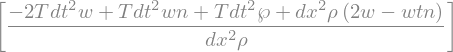

In [53]:
wp, w, wn, dt, dx, T, rho, b, f, wtp, wtn = smp.symbols('wp w wn dt dx T rho b f wtp wtn')
k1 = (wtp-(2*w)+wtn)/(dt**2)
k2 = (T/rho)*(wp-(2*w)+wn)/(dx**2)
k3 = 0*(b/rho)*(wtp-wtn)/dt
k4 = 0*(1/rho)*f
#eqn = smp.Eq(0,k1 - k2 + k3 - k4)
eqn = smp.Eq(0,k2-k1)
#eqn = smp.Eq(0,k1 - k2)
(solve(eqn,wtp))  


Create an array to hold the positions:

Wave Velocity:  10000.0  m/s
Stability Constant:  0.2
0.5 1e-05
1000000
(10, 100000)


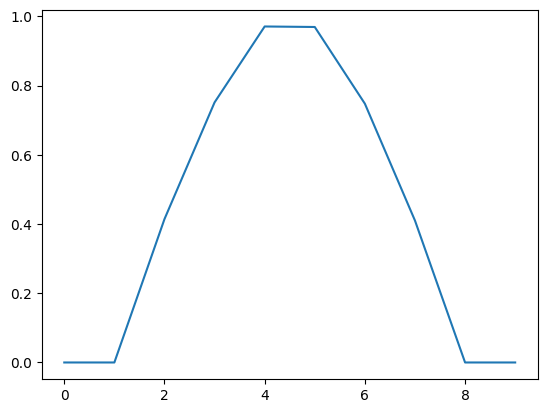

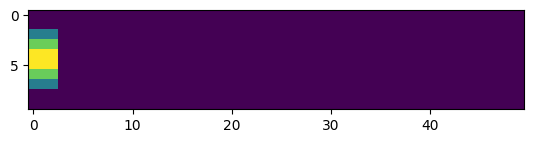

In [58]:
#Geometry
L = 5.0#[m]

#Materials
rho = 0.00000001 #[kg/m]
T = 1.0
b = 1.0

c = (T/rho)**0.5

n_x = 10
t0 = 0.0
tf = 1.0
n_t = int(100000)
x = np.linspace(0.0,L,n_x)
t = np.linspace(0,tf,n_t)
w = np.zeros((n_x,n_t))
n = np.linspace(0,n_x,n_x)

#Boundary Conditions
x0 = 0.0#[m]
xf = L#[m]

dt = (tf-t0)/n_t
dx = (xf-x0)/n_x

print('Wave Velocity: ', str(c), ' m/s')
print('Stability Constant: ', str(c*dt/dx))

print(dx,dt)
#Initial Conditions
#w[25:30][2500] = 0.25

#Stimulus
f = np.zeros((n_x,n_t))
#w[0:30][100:200] = 1.00
#w[0:5][5] = 5
w[:,0]=(-np.cos((2*3.145926/n_x)*n)+1)/2
w[:,1]=(-np.cos((2*3.145926/n_x)*n)+1)/2
w[:,2]=(-np.cos((2*3.145926/n_x)*n)+1)/2

#Boundary conditions
w[0:2,:] = 0
w[n_x-2:n_x,:] = 0

#print(w[:,0])
#print(w[:,0])
#print(w[:][0])
print(w.size)
print(w.shape)
plt.plot(w[:,0])
plt.show()
plt.imshow(w[:,0:50])

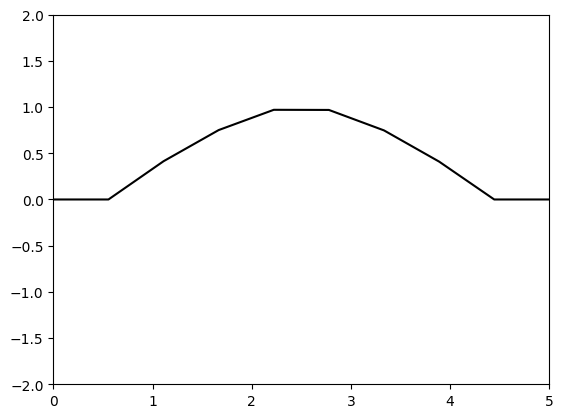

In [60]:
fig = plt.figure()
l, = plt.plot([],[], 'k-')
plt.xlim(0,L)
plt.ylim(-2,2)

l.set_data(x,w[:,0])
plt.show()

metadata = dict(title='Movie', artist='Nathaniel_Rohrick')
writer = PillowWriter(fps=24,metadata=metadata)

#Create animation function
#def crunch(fps):
    

0.0
0.0
0.0
0.0
0.0
0.0


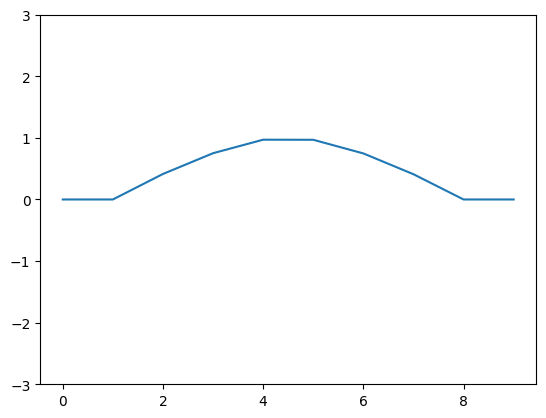


0.0
0.0
0.0
0.0
0.0
0.0


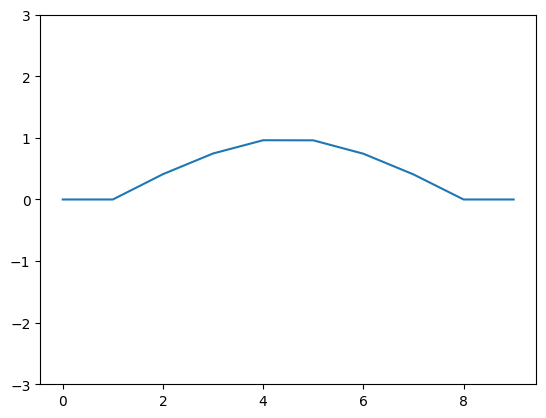


0.0
0.0
0.0
0.0
0.0
0.0


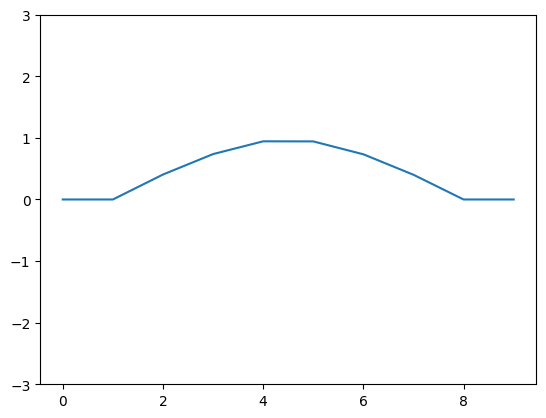


0.0
0.0
0.0
0.0
0.0
0.0


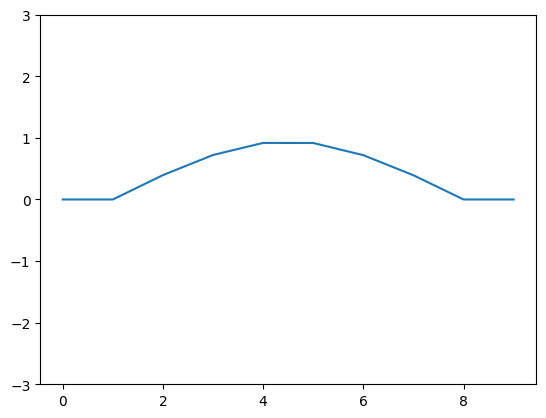


0.0
0.0
0.0
0.0
0.0
0.0


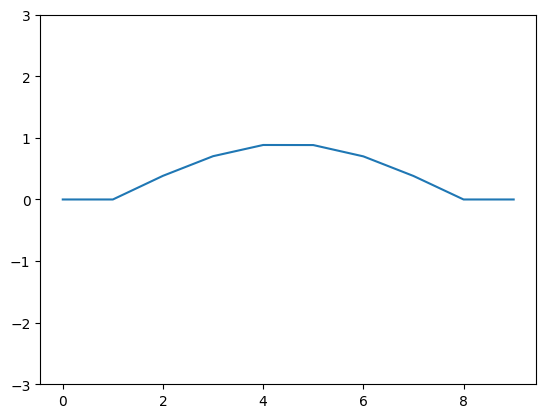


0.0
0.0
0.0
0.0
0.0
0.0


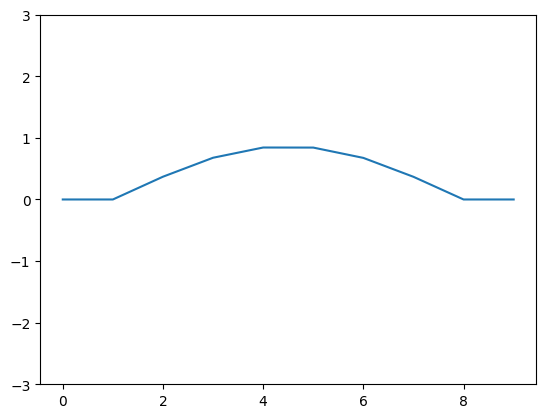


0.0
0.0
0.0
0.0
0.0
0.0


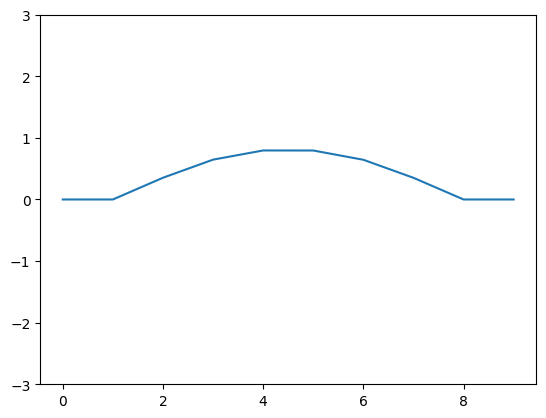


0.0
0.0
0.0
0.0
0.0
0.0


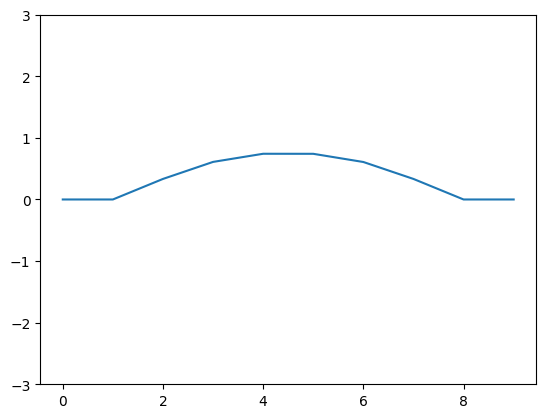


0.0
0.0
0.0
0.0
0.0
0.0


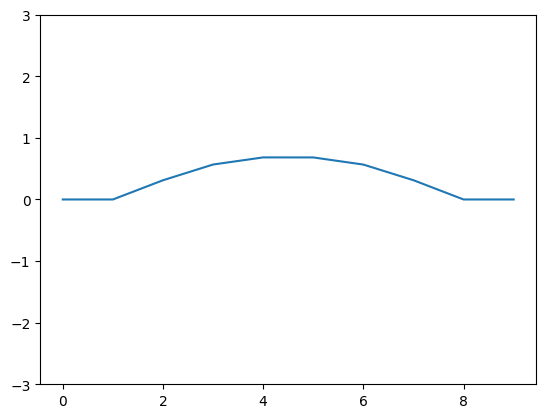


0.0
0.0
0.0
0.0
0.0
0.0


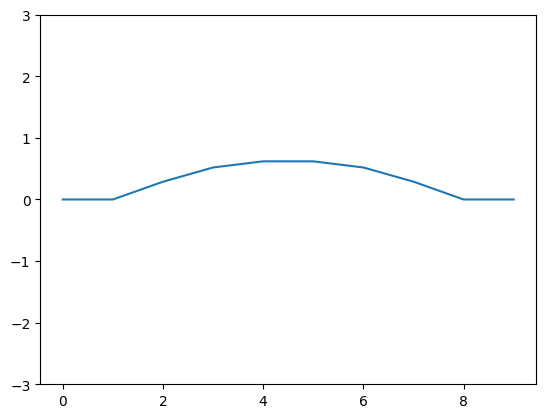


0.0
0.0
0.0
0.0
0.0
0.0


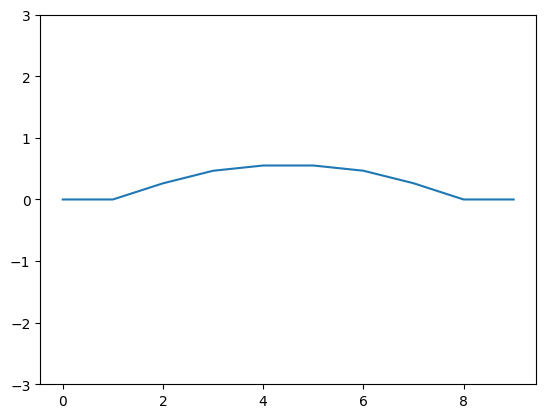


0.0
0.0
0.0
0.0
0.0
0.0


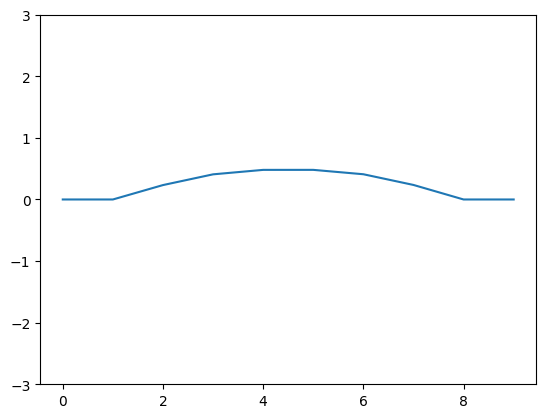


0.0
0.0
0.0
0.0
0.0
0.0


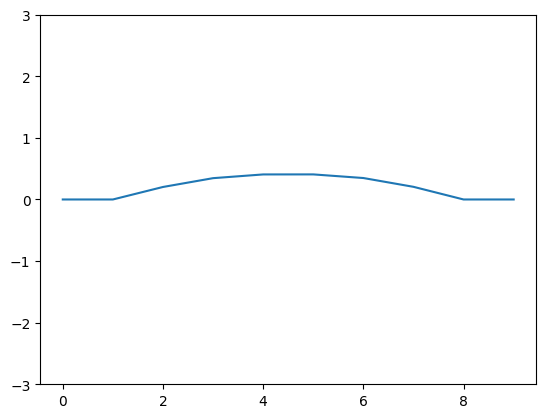


0.0
0.0
0.0
0.0
0.0
0.0


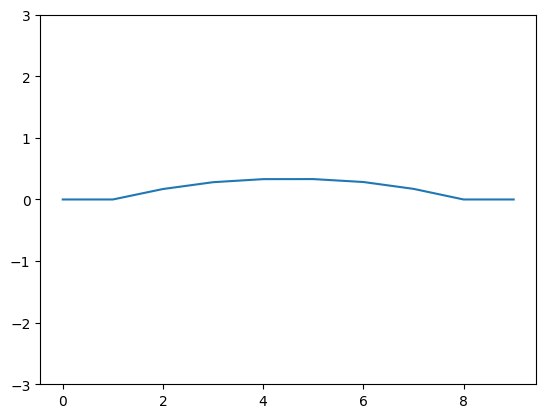


0.0
0.0
0.0
0.0
0.0
0.0


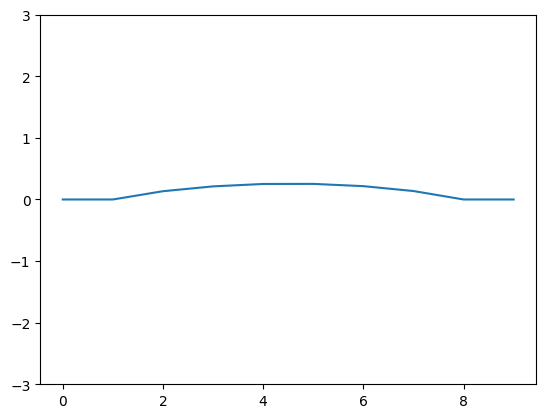


0.0
0.0
0.0
0.0
0.0
0.0


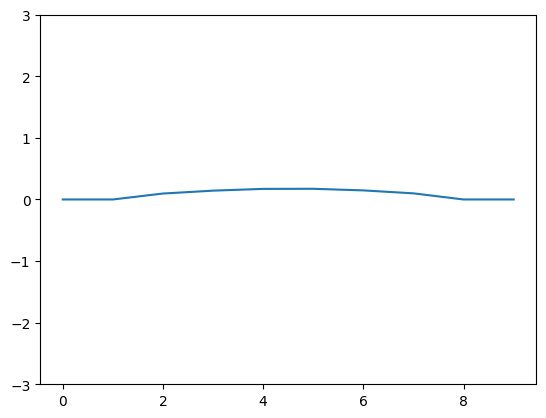


0.0
0.0
0.0
0.0
0.0
0.0


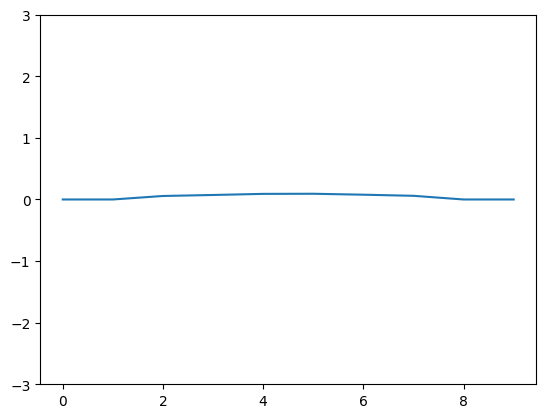


0.0
0.0
0.0
0.0
0.0
0.0


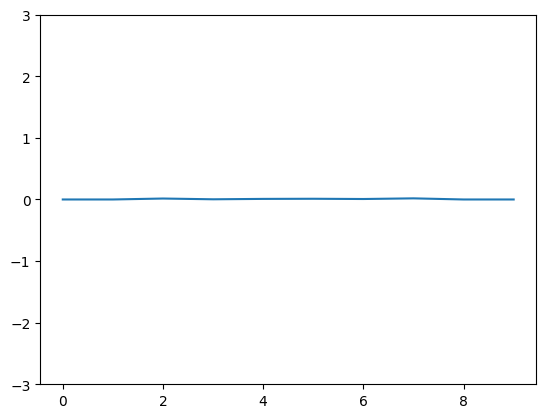


0.0
0.0
0.0
0.0
0.0
0.0


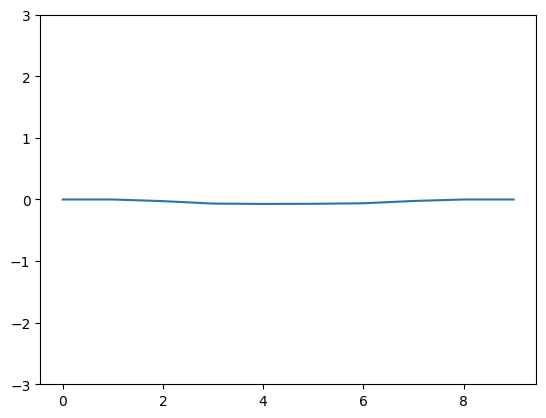


0.0
0.0
0.0
0.0
0.0
0.0


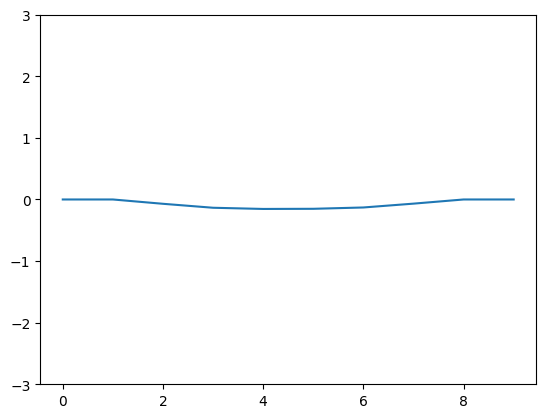


0.0
0.0
0.0
0.0
0.0
0.0


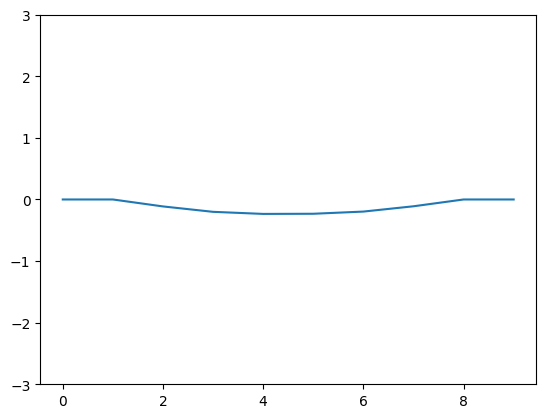


0.0
0.0
0.0
0.0
0.0
0.0


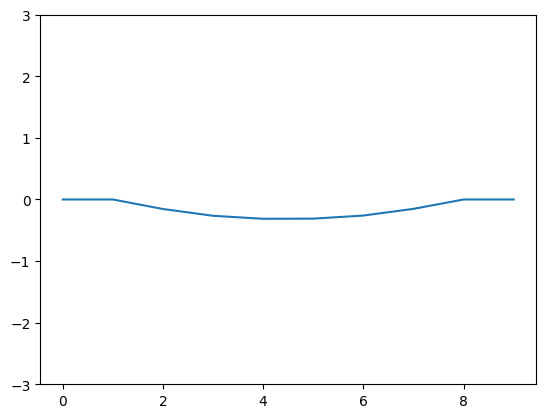


0.0
0.0
0.0
0.0
0.0
0.0


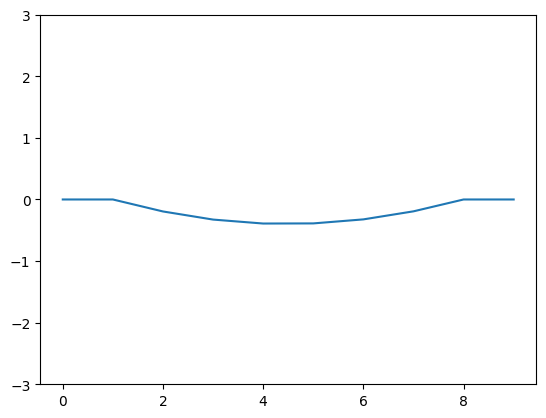


0.0
0.0
0.0
0.0
0.0
0.0


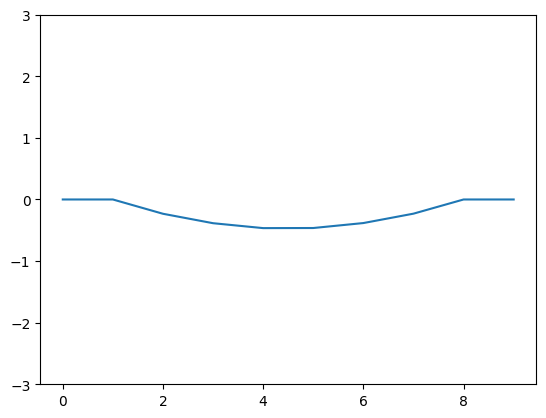


0.0
0.0
0.0
0.0
0.0
0.0


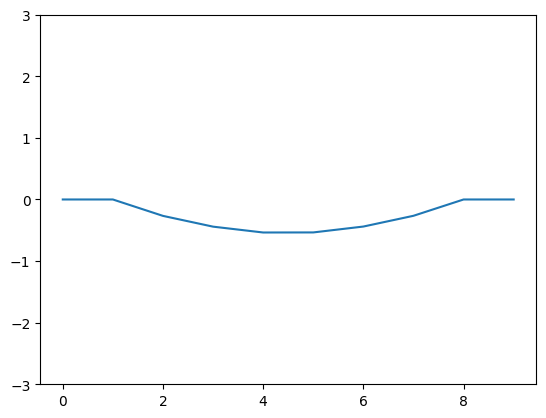


0.0
0.0
0.0
0.0
0.0
0.0


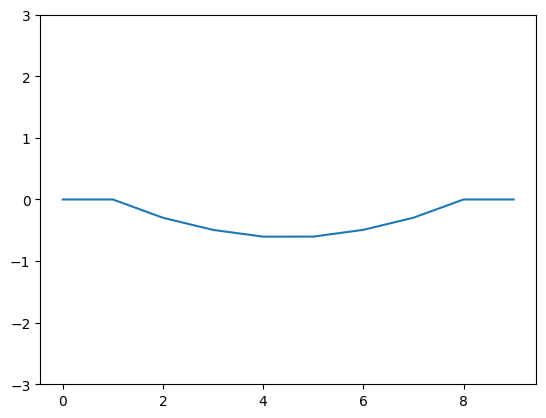


0.0
0.0
0.0
0.0
0.0
0.0


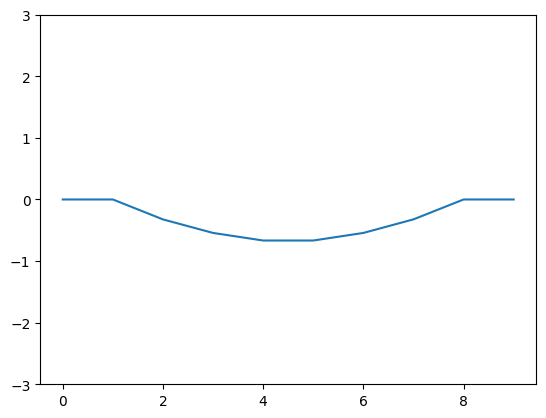


0.0
0.0
0.0
0.0
0.0
0.0


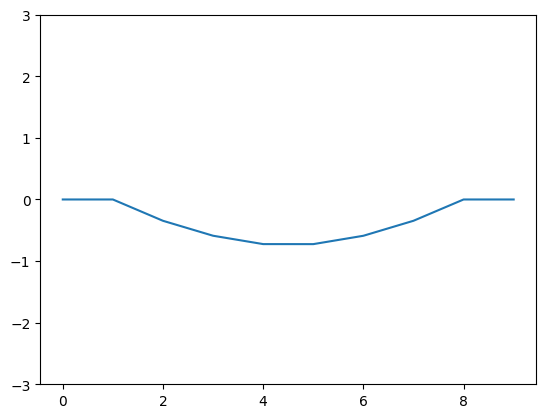


0.0
0.0
0.0
0.0
0.0
0.0


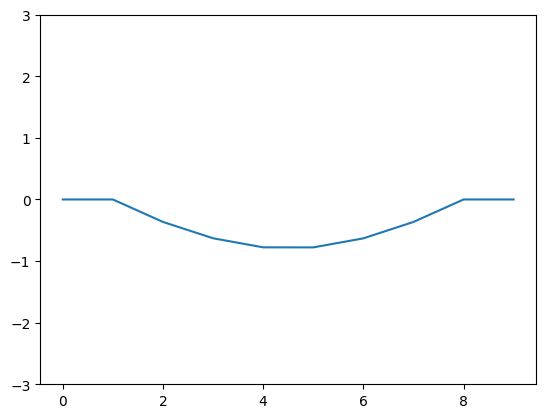


0.0
0.0
0.0
0.0
0.0
0.0


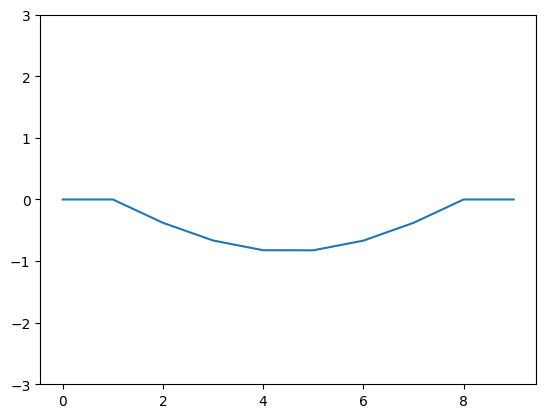


0.0
0.0
0.0
0.0
0.0
0.0


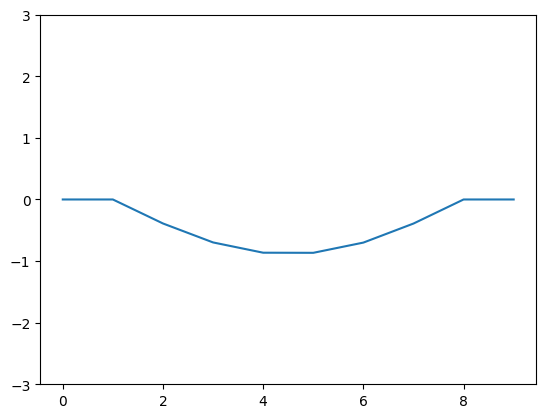


0.0
0.0
0.0
0.0
0.0
0.0


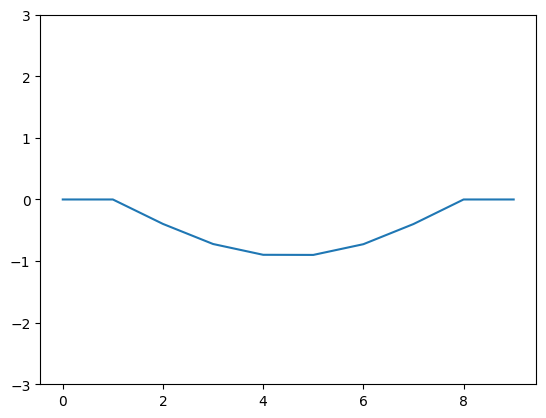


0.0
0.0
0.0
0.0
0.0
0.0


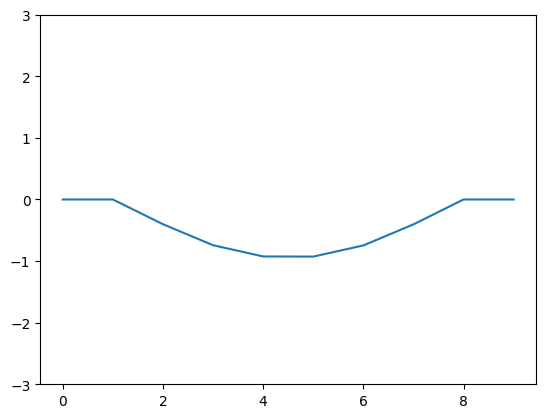


0.0
0.0
0.0
0.0
0.0
0.0


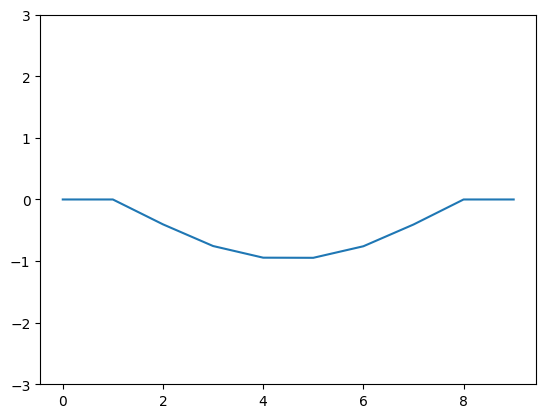


0.0
0.0
0.0
0.0
0.0
0.0


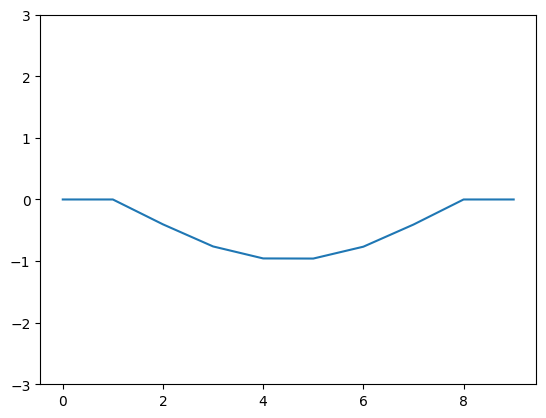


0.0
0.0
0.0
0.0
0.0
0.0


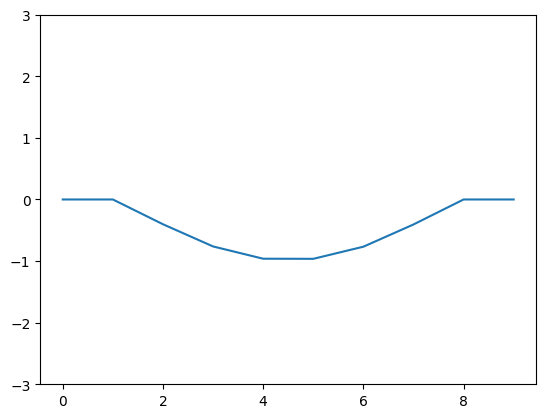


0.0
0.0
0.0
0.0
0.0
0.0


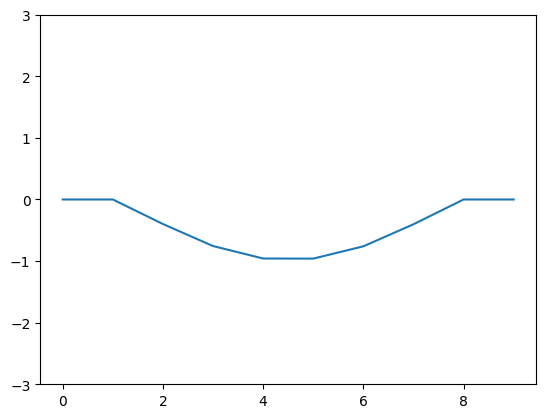


0.0
0.0
0.0
0.0
0.0
0.0


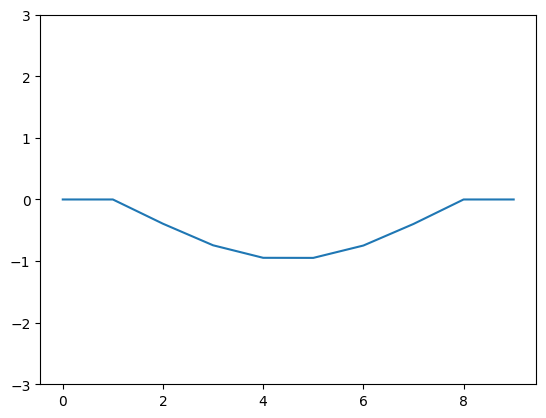


0.0
0.0
0.0
0.0
0.0
0.0


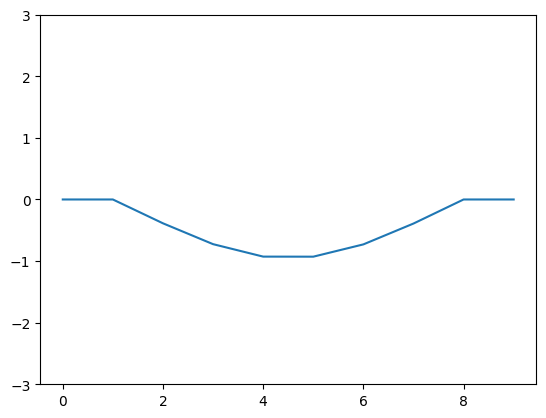


0.0
0.0
0.0
0.0
0.0
0.0


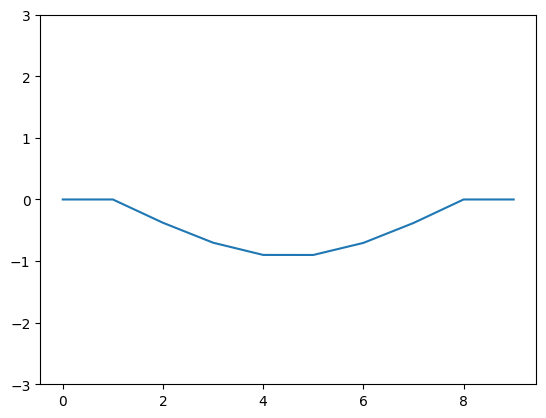


0.0
0.0
0.0
0.0
0.0
0.0


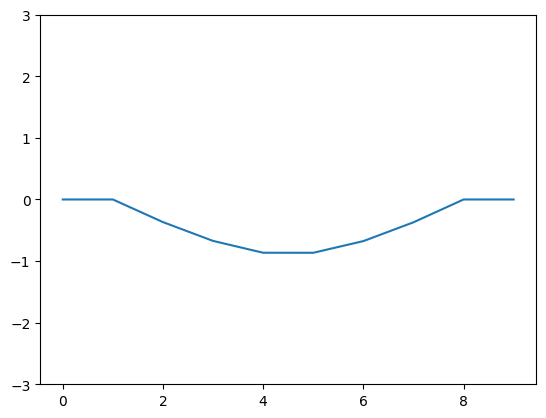


0.0
0.0
0.0
0.0
0.0
0.0


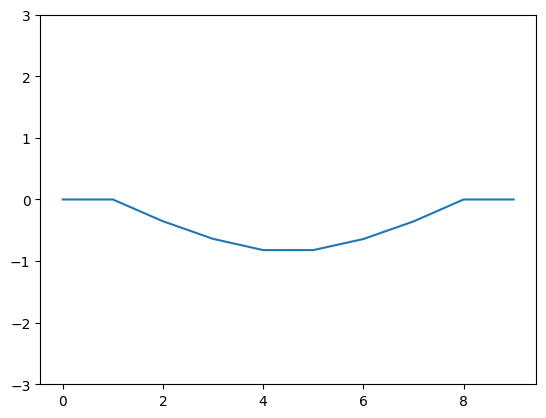


0.0
0.0
0.0
0.0
0.0
0.0


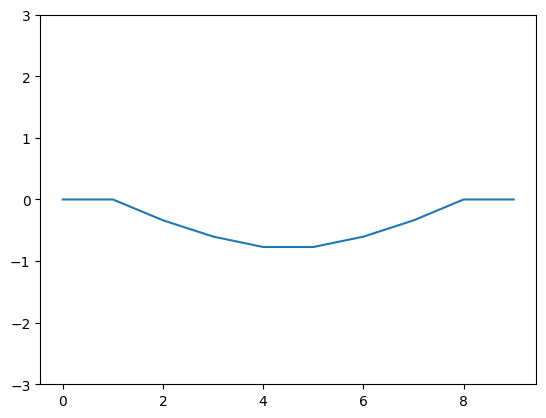


0.0
0.0
0.0
0.0
0.0
0.0


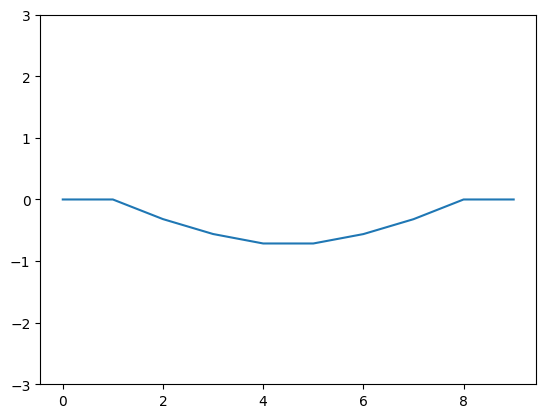


0.0
0.0
0.0
0.0
0.0
0.0


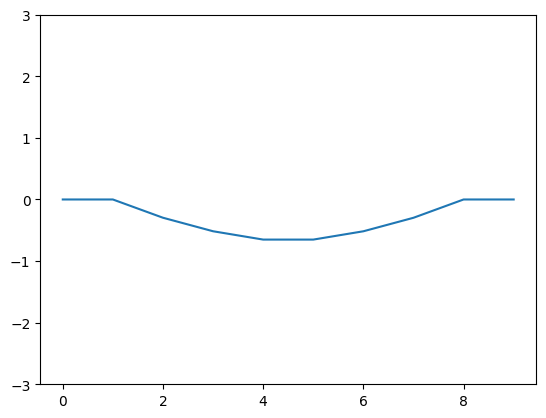


0.0
0.0
0.0
0.0
0.0
0.0


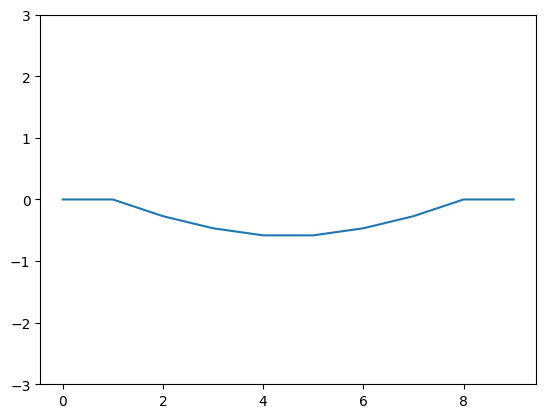


0.0
0.0
0.0
0.0
0.0
0.0


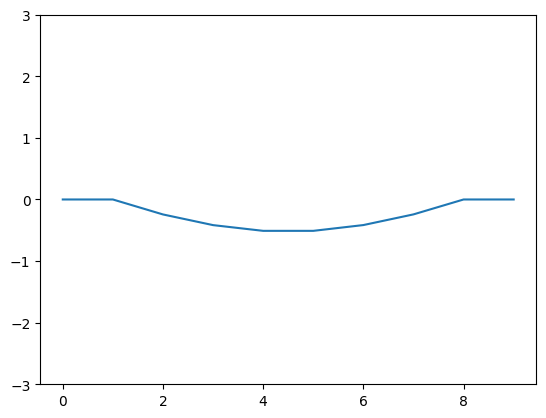


0.0
0.0
0.0
0.0
0.0
0.0


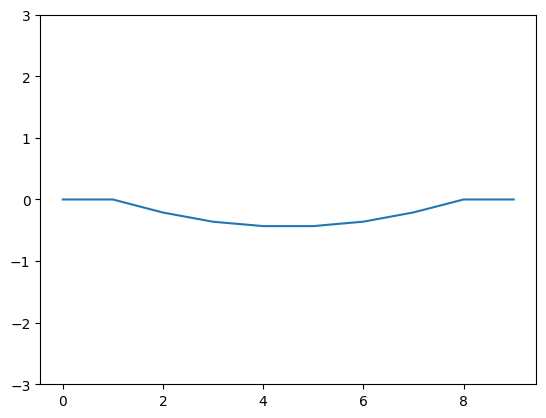


0.0
0.0
0.0
0.0
0.0
0.0


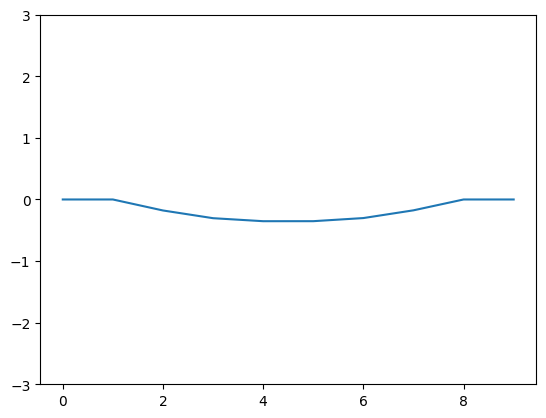


0.0
0.0
0.0
0.0
0.0
0.0


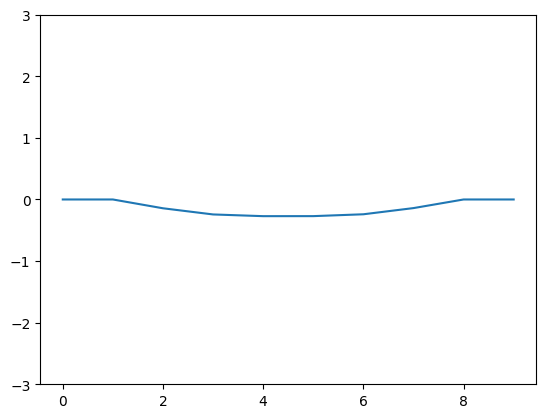


0.0
0.0
0.0
0.0
0.0
0.0


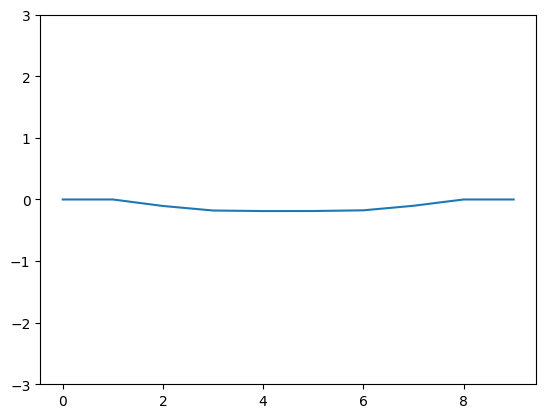


0.0
0.0
0.0
0.0
0.0
0.0


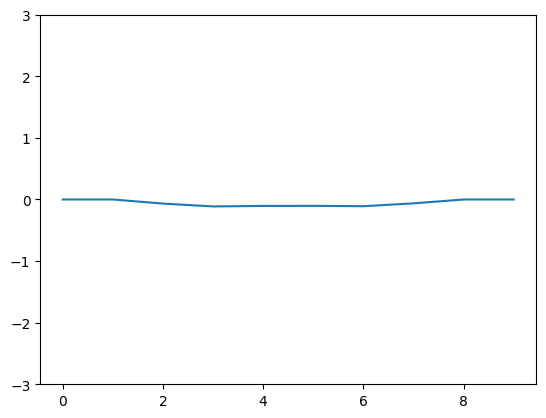


0.0
0.0
0.0
0.0
0.0
0.0


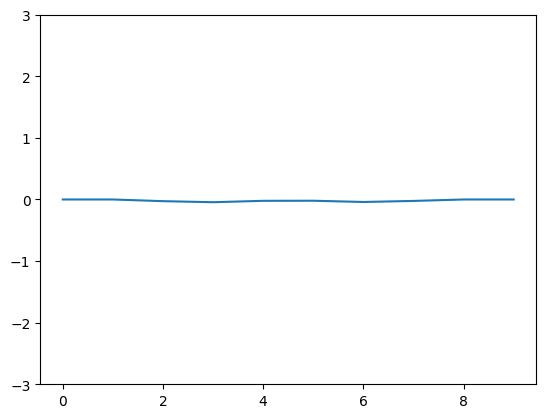


0.0
0.0
0.0
0.0
0.0
0.0


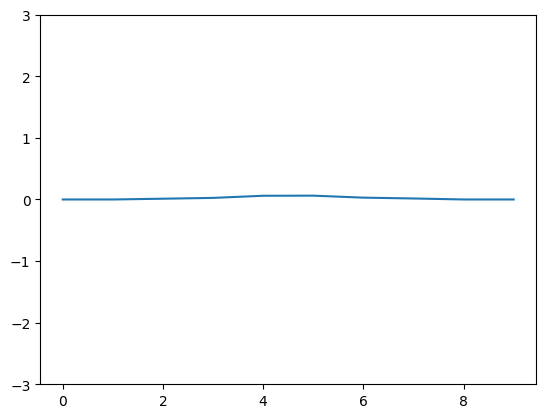


0.0
0.0
0.0
0.0
0.0
0.0


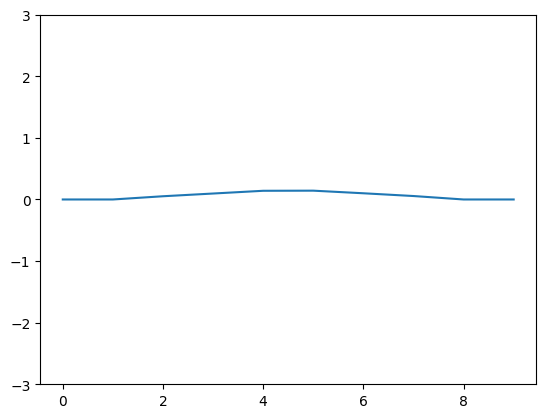


0.0
0.0
0.0
0.0
0.0
0.0


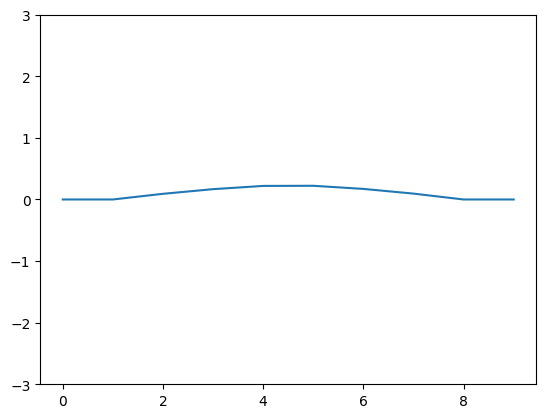


0.0
0.0
0.0
0.0
0.0
0.0


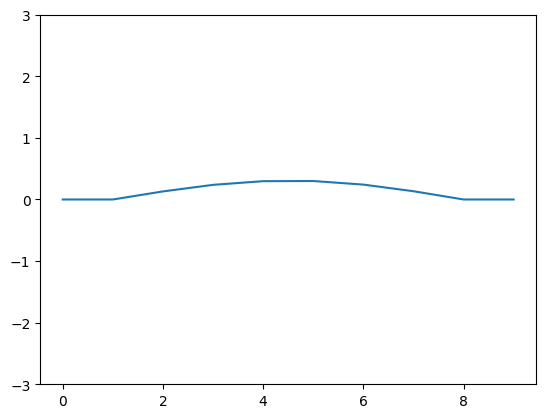


0.0
0.0
0.0
0.0
0.0
0.0


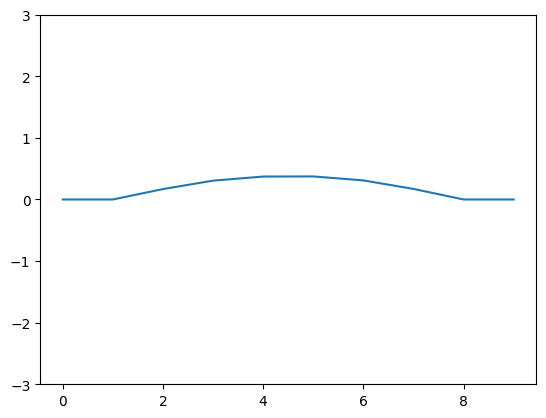


0.0
0.0
0.0
0.0
0.0
0.0


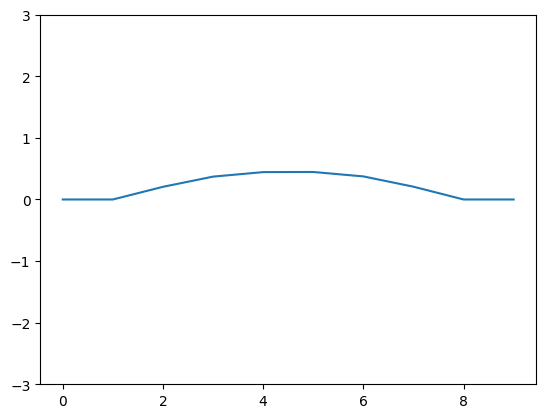


0.0
0.0
0.0
0.0
0.0
0.0


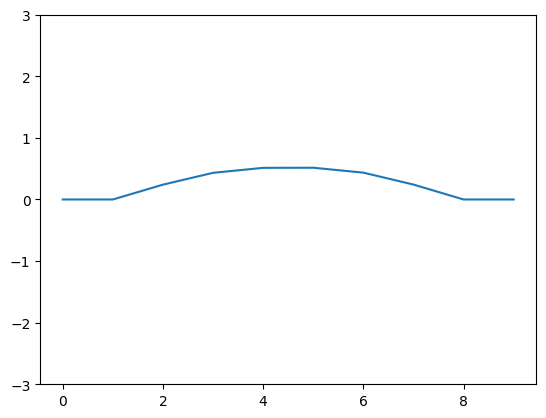


0.0
0.0
0.0
0.0
0.0
0.0


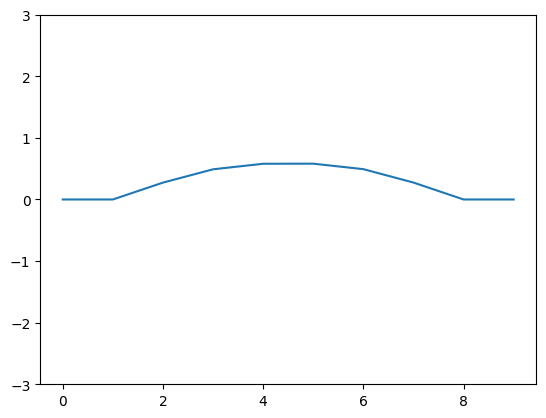


0.0
0.0
0.0
0.0
0.0
0.0


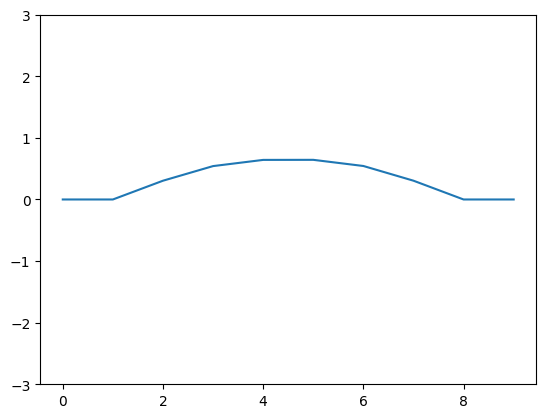


0.0
0.0
0.0
0.0
0.0
0.0


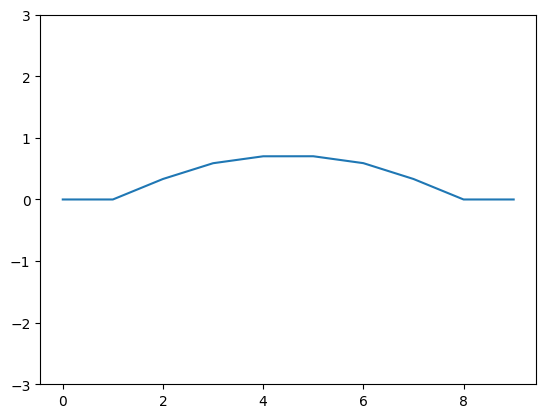


0.0
0.0
0.0
0.0
0.0
0.0


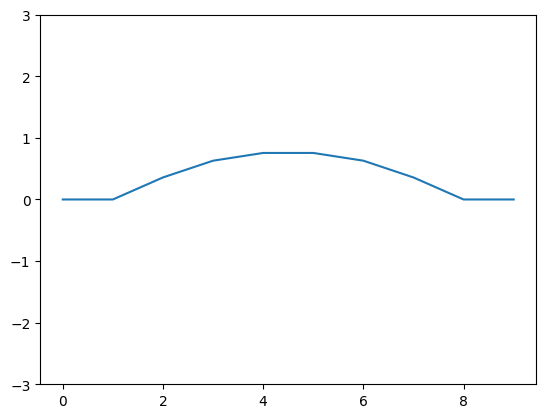


0.0
0.0
0.0
0.0
0.0
0.0


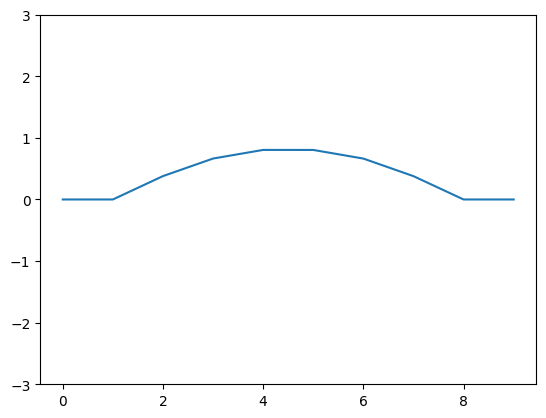


0.0
0.0
0.0
0.0
0.0
0.0


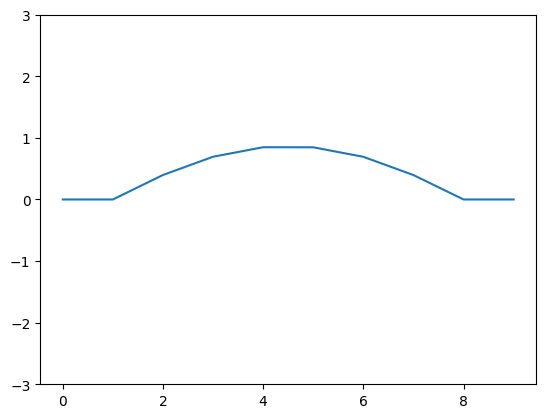


0.0
0.0
0.0
0.0
0.0
0.0


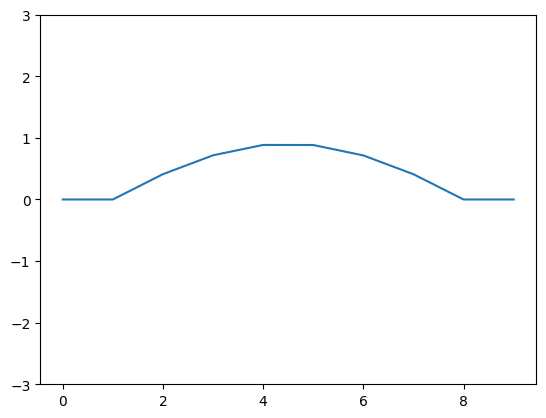


0.0
0.0
0.0
0.0
0.0
0.0


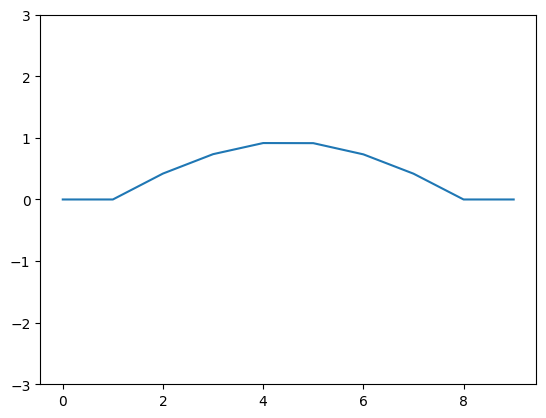


0.0
0.0
0.0
0.0
0.0
0.0


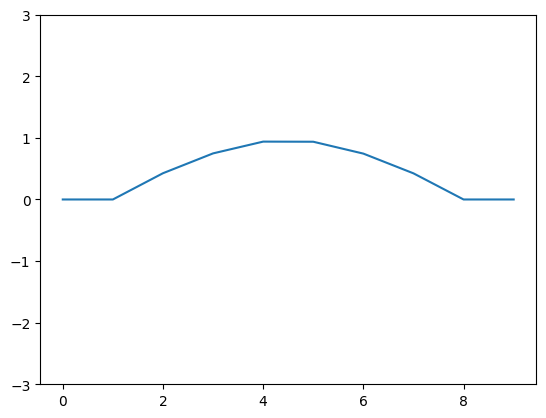


0.0
0.0
0.0
0.0
0.0
0.0


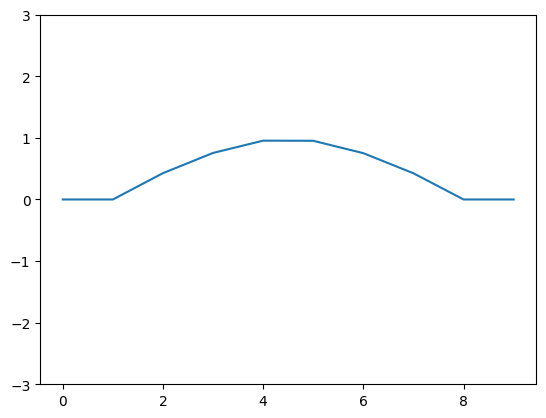


0.0
0.0
0.0
0.0
0.0
0.0


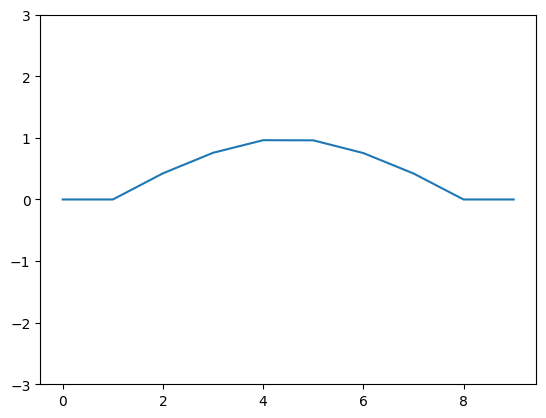


0.0
0.0
0.0
0.0
0.0
0.0


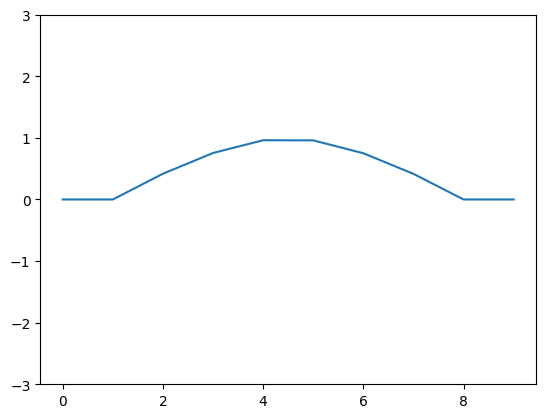


0.0
0.0
0.0
0.0
0.0
0.0


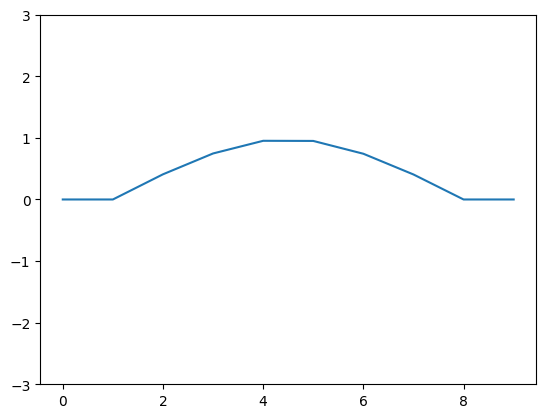


0.0
0.0
0.0
0.0
0.0
0.0


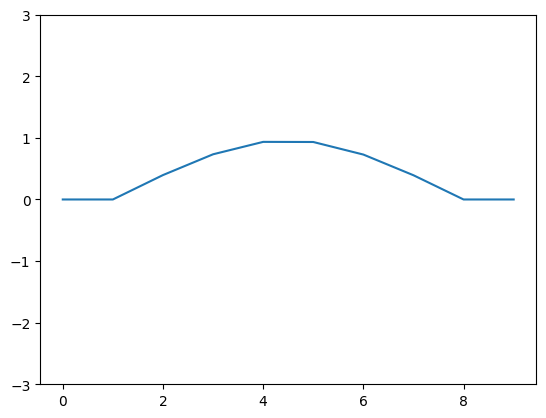


0.0
0.0
0.0
0.0
0.0
0.0


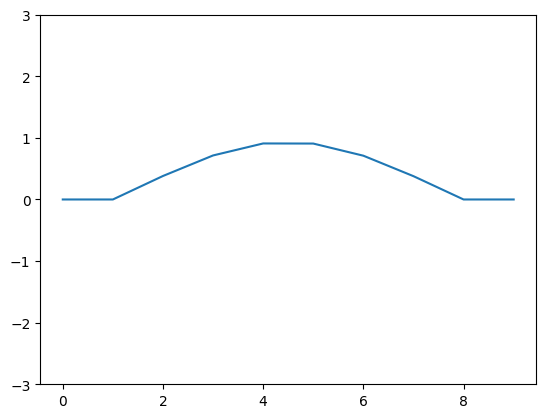


0.0
0.0
0.0
0.0
0.0
0.0


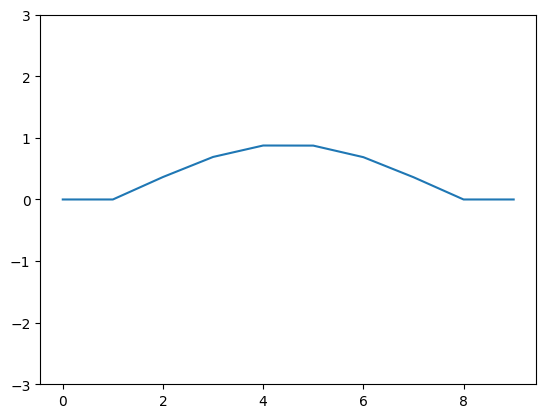


0.0
0.0
0.0
0.0
0.0
0.0


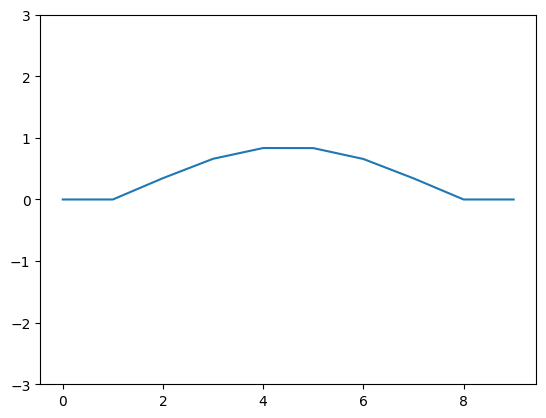


0.0
0.0
0.0
0.0
0.0
0.0


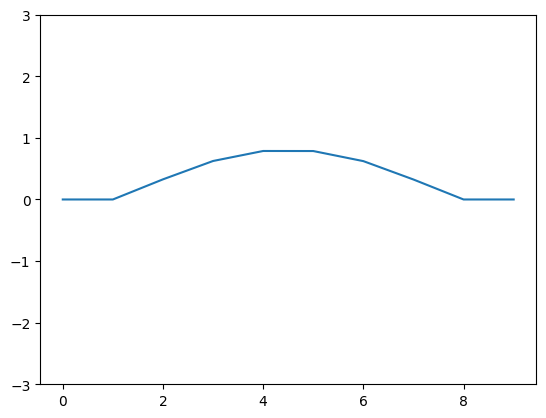


0.0
0.0
0.0
0.0
0.0
0.0


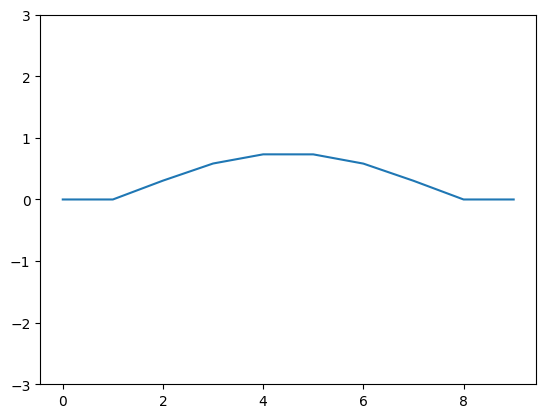


0.0
0.0
0.0
0.0
0.0
0.0


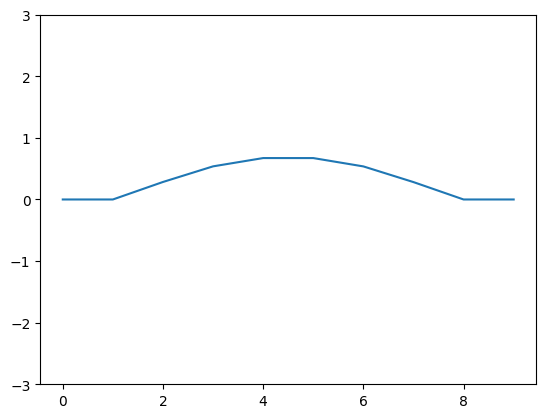


0.0
0.0
0.0
0.0
0.0
0.0


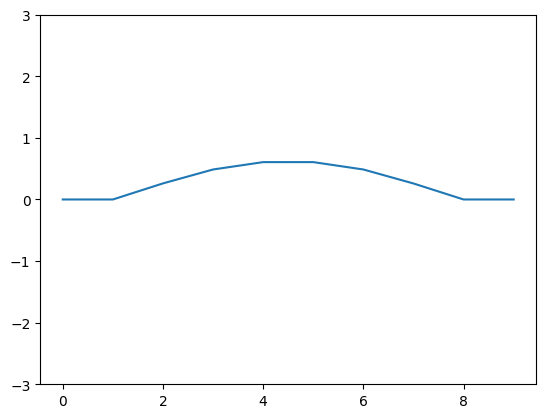


0.0
0.0
0.0
0.0
0.0
0.0


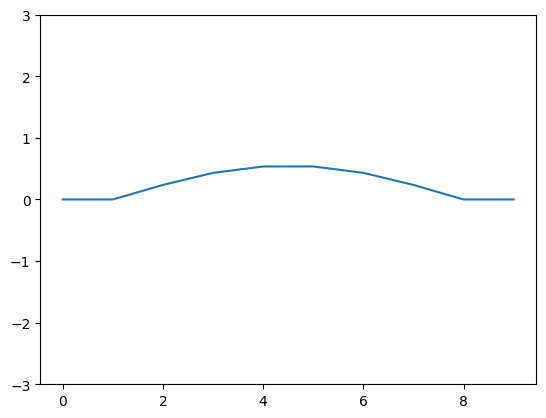


0.0
0.0
0.0
0.0
0.0
0.0


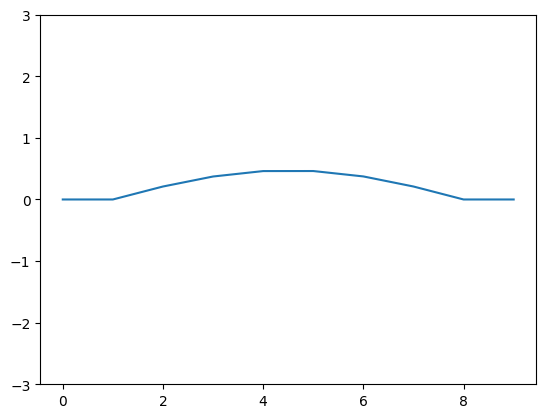


0.0
0.0
0.0
0.0
0.0
0.0


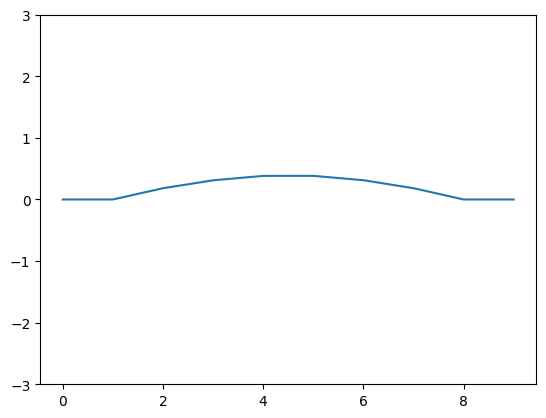


0.0
0.0
0.0
0.0
0.0
0.0


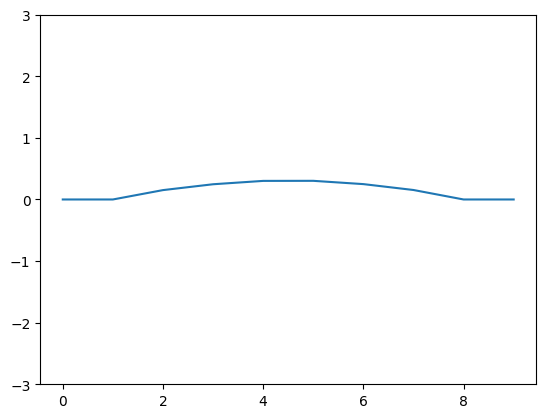


0.0
0.0
0.0
0.0
0.0
0.0


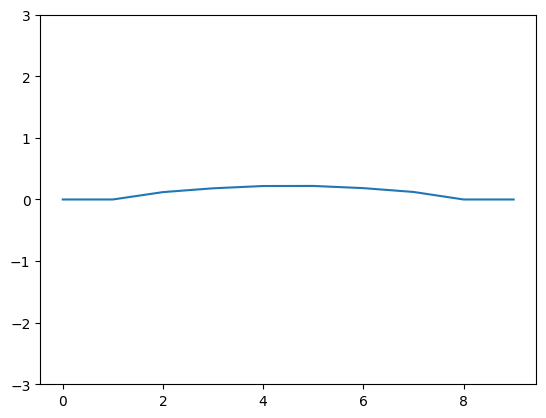


0.0
0.0
0.0
0.0
0.0
0.0


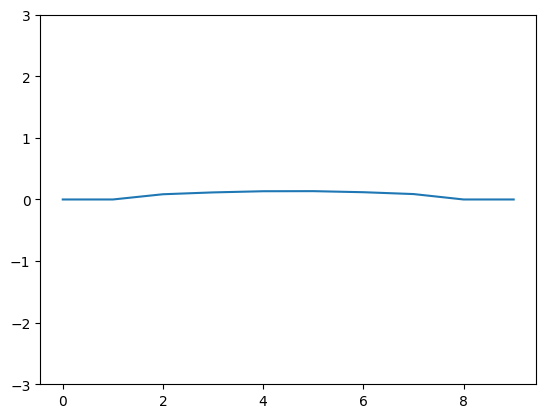


0.0
0.0
0.0
0.0
0.0
0.0


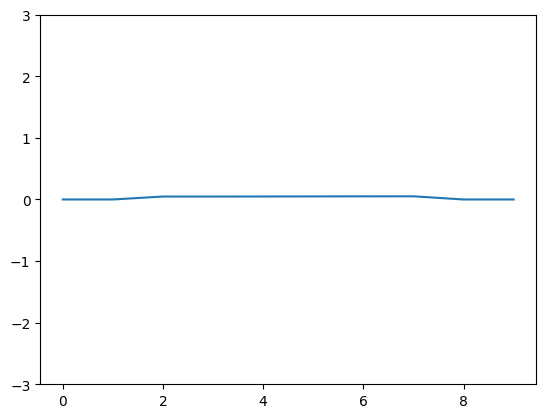


0.0
0.0
0.0
0.0
0.0
0.0


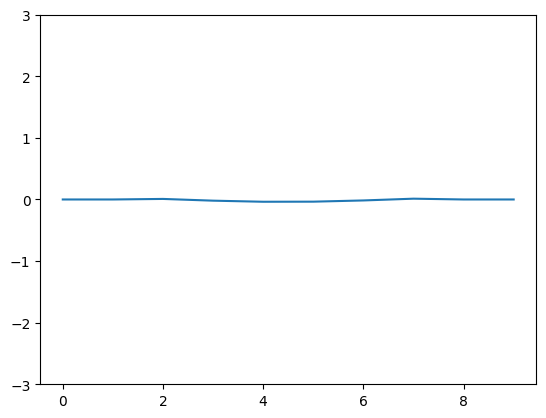


0.0
0.0
0.0
0.0
0.0
0.0


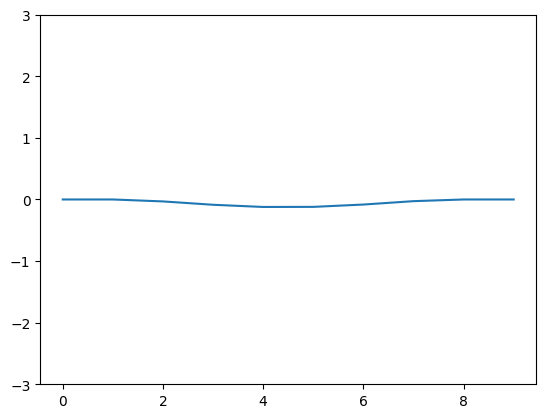


0.0
0.0
0.0
0.0
0.0
0.0


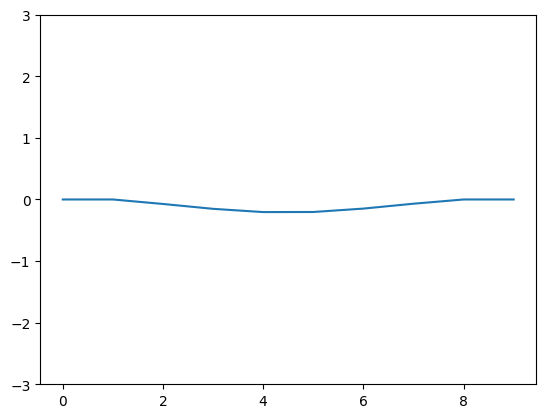


0.0
0.0
0.0
0.0
0.0
0.0


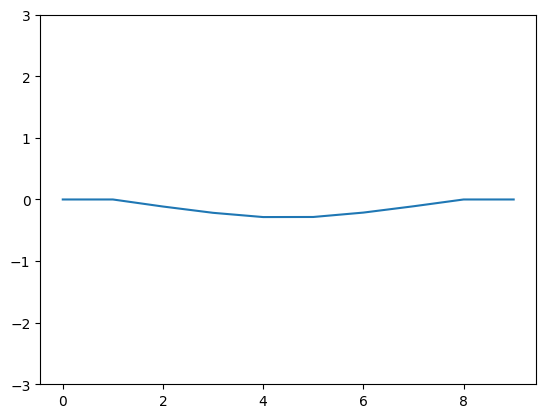


0.0
0.0
0.0
0.0
0.0
0.0


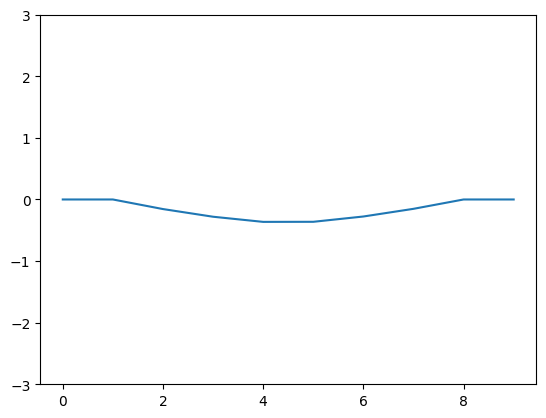


0.0
0.0
0.0
0.0
0.0
0.0


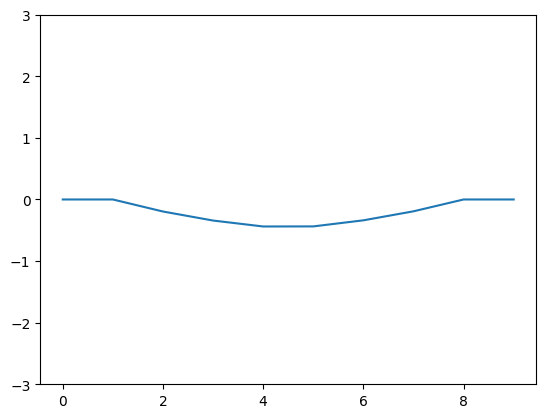


0.0
0.0
0.0
0.0
0.0
0.0


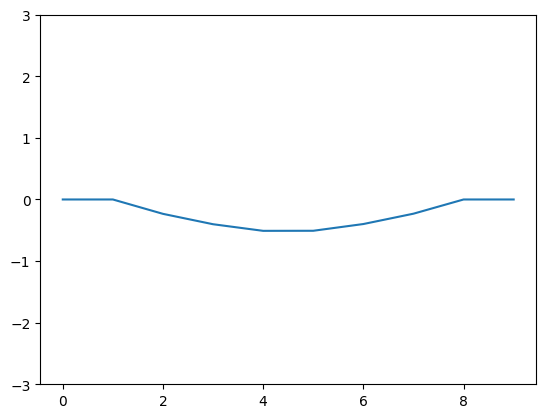


0.0
0.0
0.0
0.0
0.0
0.0


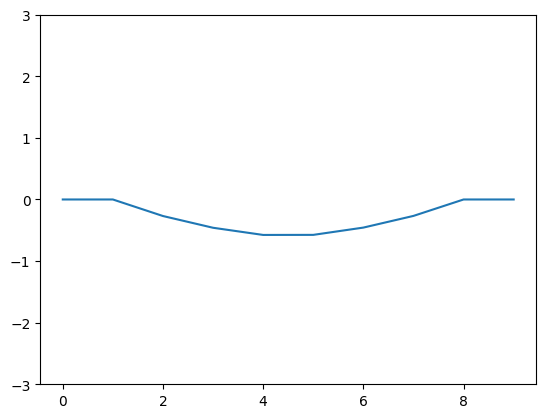


0.0
0.0
0.0
0.0
0.0
0.0


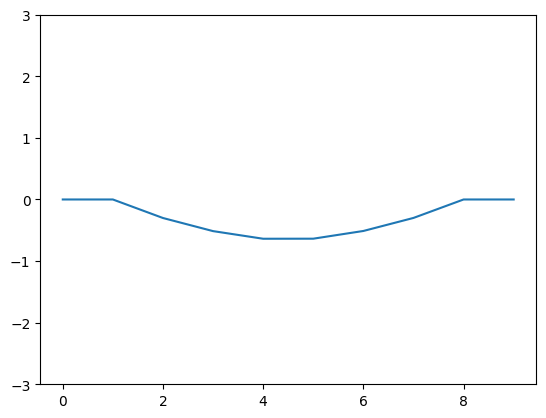


0.0
0.0
0.0
0.0
0.0
0.0


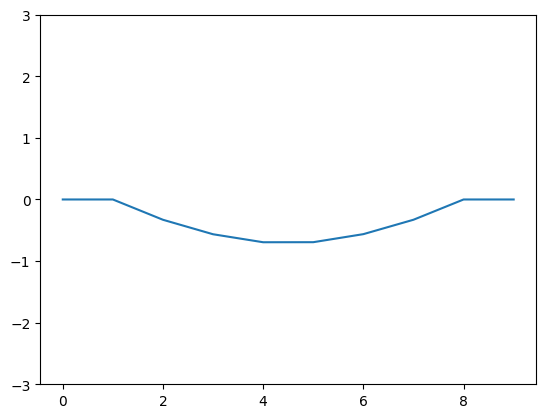


0.0
0.0
0.0
0.0
0.0
0.0


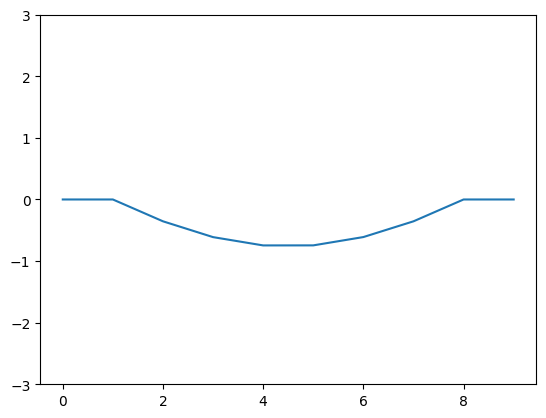


0.0
0.0
0.0
0.0
0.0
0.0


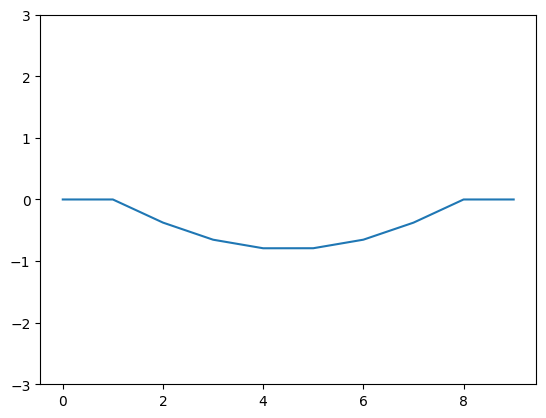


0.0
0.0
0.0
0.0
0.0
0.0


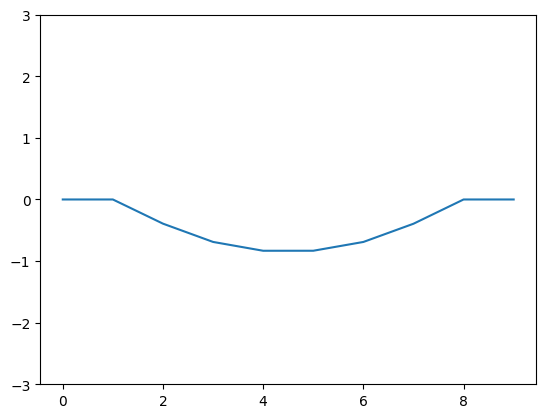


0.0
0.0
0.0
0.0
0.0
0.0


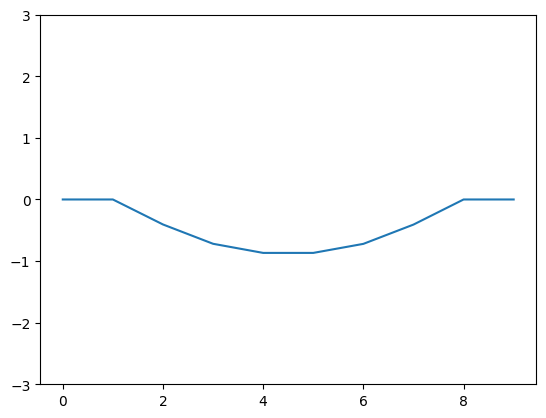


0.0
0.0
0.0
0.0
0.0
0.0


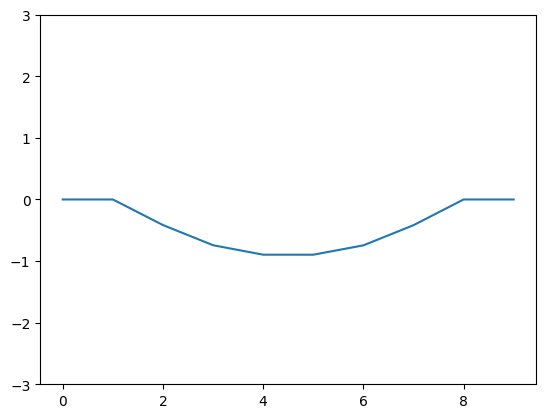


0.0
0.0
0.0
0.0
0.0
0.0


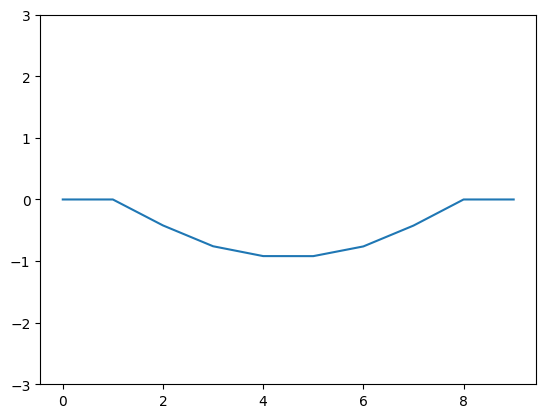


0.0
0.0
0.0
0.0
0.0
0.0


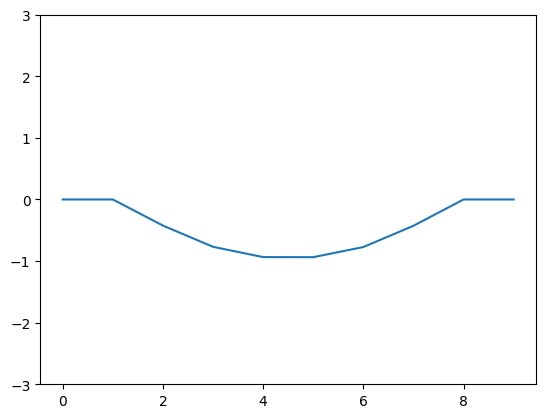


0.0
0.0
0.0
0.0
0.0
0.0


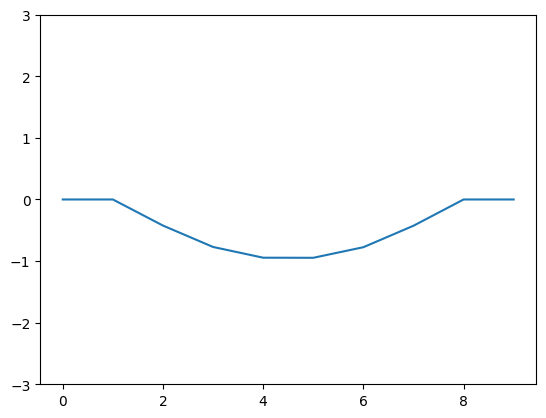


0.0
0.0
0.0
0.0
0.0
0.0


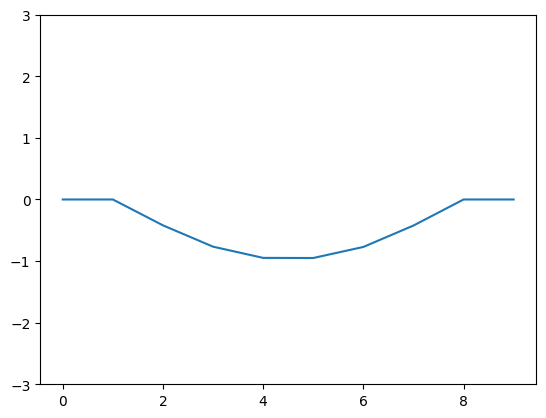


0.0
0.0
0.0
0.0
0.0
0.0


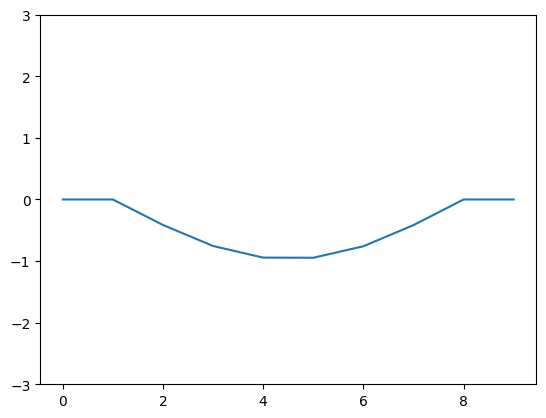


0.0
0.0
0.0
0.0
0.0
0.0


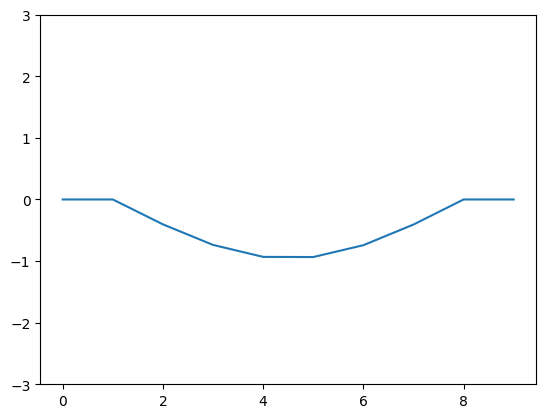


0.0
0.0
0.0
0.0
0.0
0.0


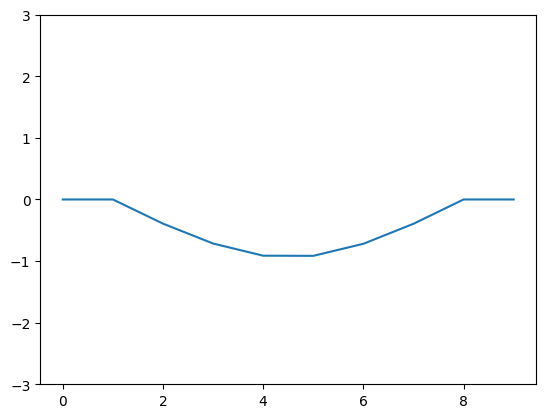


0.0
0.0
0.0
0.0
0.0
0.0


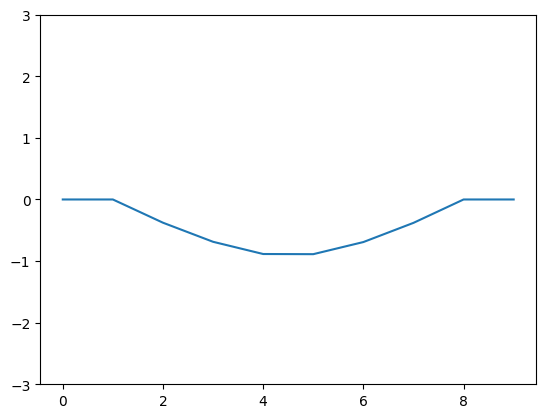


0.0
0.0
0.0
0.0
0.0
0.0


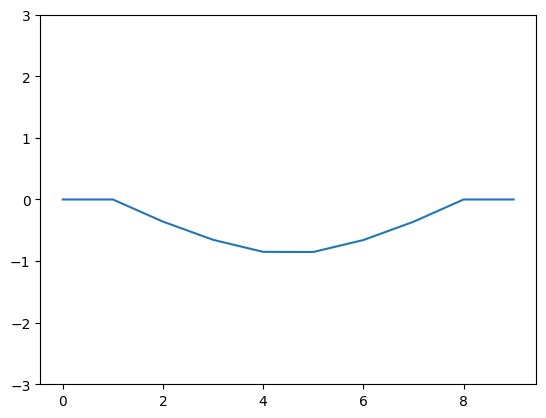


0.0
0.0
0.0
0.0
0.0
0.0


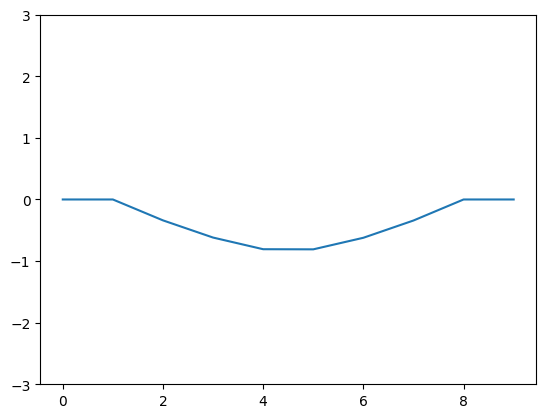


0.0
0.0
0.0
0.0
0.0
0.0


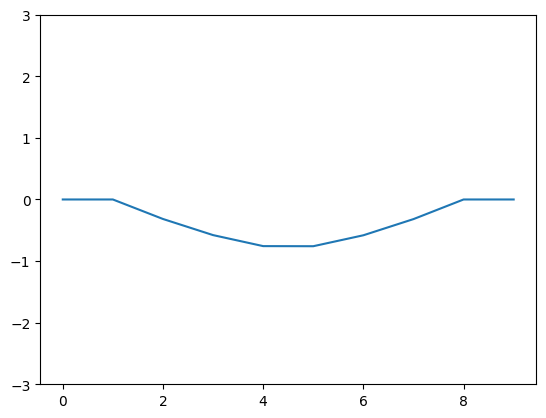


0.0
0.0
0.0
0.0
0.0
0.0


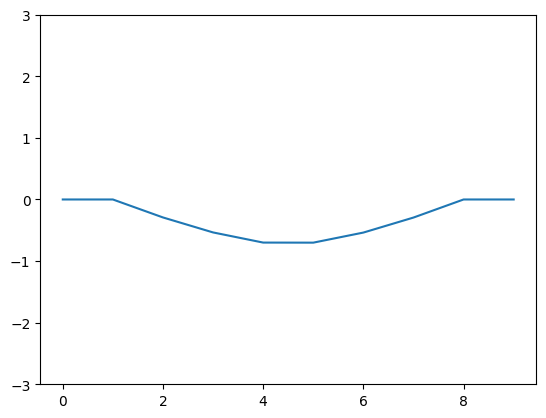


0.0
0.0
0.0
0.0
0.0
0.0


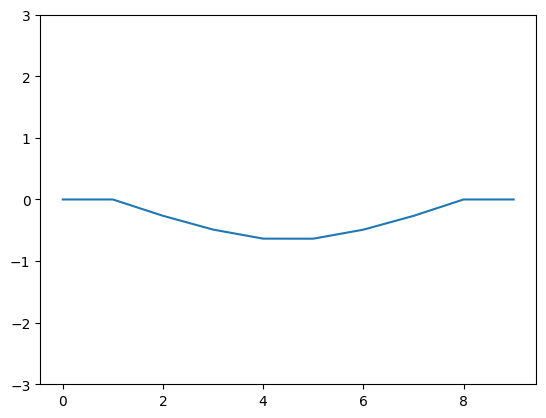


0.0
0.0
0.0
0.0
0.0
0.0


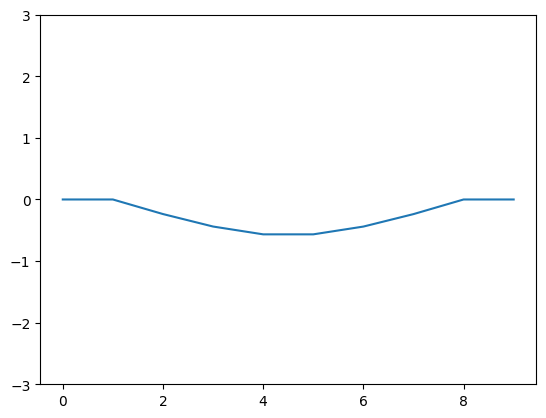


0.0
0.0
0.0
0.0
0.0
0.0


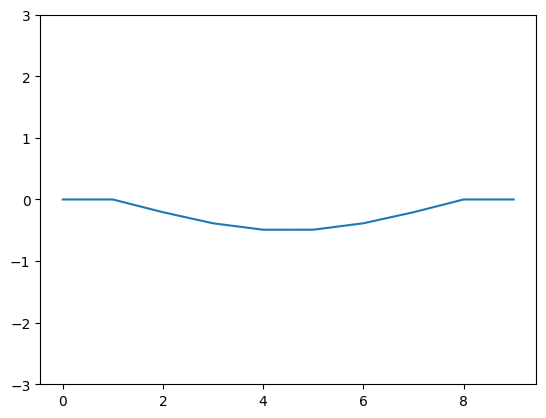


0.0
0.0
0.0
0.0
0.0
0.0


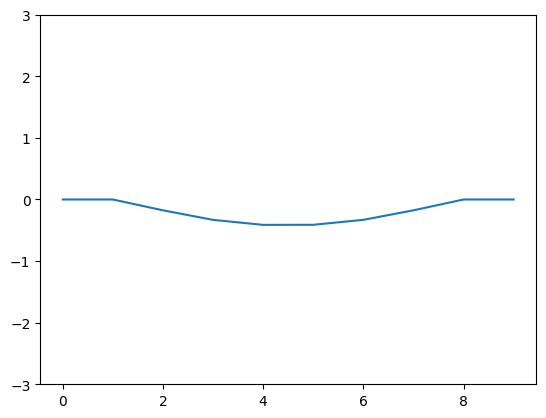


0.0
0.0
0.0
0.0
0.0
0.0


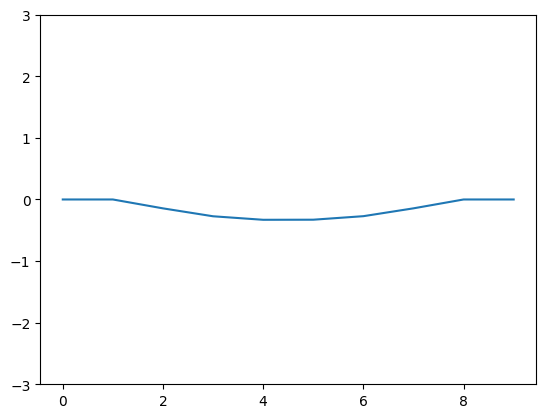


0.0
0.0
0.0
0.0
0.0
0.0


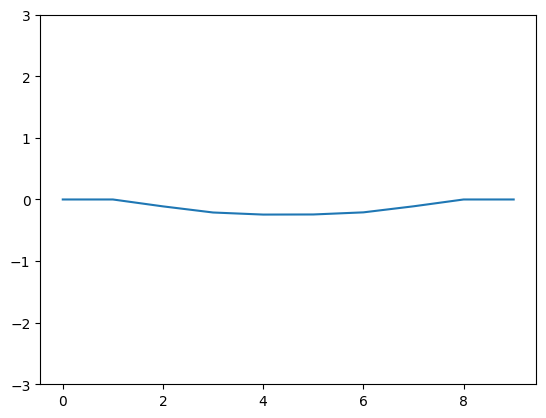

KeyboardInterrupt: Interrupted by user

In [56]:
boundary = w
for j in range(n_t):#Iterate in time
    
    if j == 0:
        continue
    if j > n_t-2:
        continue
    for i in range(n_x):#Iterate in space
        if i < 2:#Boundary condition
            continue
        if i > n_x-3:#Boundary condition
            continue
        #print(dx**2)
        #w[i,j+1] = (-2*T*(dt**2)*w[i,j] + T*(dt**2)*w[i-1,j] + T*(dt**2)*w[i+1,j] + b*dt*(dx**2)*w[i,j-1] + (dt**2)*(dx**2)*f[i,j] * 2*(dx**2)*rho*w[i,j] - (dx**2)*rho*w[i,j-1]) / ((dx**2)*(b*dt+rho))
        #print(i,j)
        #w[i,j+1] = ((-2*T*(dt**2)*w[i,j] + T*(dt**2)*w[i-1,j] + T*(dt**2)*w[i+1,j] - (dx**2)*rho*(2*w[i,j] - w[i,j-1])) / ((dx**2)*rho))
        print(w[1,j])
        w[i,j+1] = ((T*dt**2*(-2*w[i,j] + w[i-1,j] + w[i+1,j]) + (dx**2)*rho*(2*w[i,j] - w[i,j-1])) / ((dx**2)*rho))
        term1 = (T*dt**2*(w[i+1,j] -2*w[i,j] + w[i-1,j]))/((dx**2)*rho)
        term2 = ((dx**2)*rho*(2*w[i,j] + w[i,j-1]))/((dx**2)*rho)
        #print(term1, term2)
        #print('term3: ', str(T*(dt**2)*w[i+1,j]/((dx**2)*rho)))
        #print('term4: ', str((dx**2)*rho*(2*w[i,j] - w[i,j-1])/((dx**2)*rho)))
        #print(x[i][j+1])
        #print(i,j)
    plt.plot(w[:,j])
    plt.ylim([-3, 3])
    plt.show()
    input()
        #plt.hold(True)
#w = w.transpose
#plt.plot(w[:,j])
#plt.show()